## Framingham Heart Disease Prediction Model

### importing libraires 

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### read in the data 

In [3]:
df = pd.read_csv('framingham.csv')

In [4]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### understanding the data 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


### Data cleaning

In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
column_median = df['education'].median()
column_median

2.0

In [12]:
df['education'].fillna(column_median, inplace=True)

In [13]:
print(df['education'].isnull().sum())

0


In [14]:
column_mean = df['cigsPerDay'].mean()
column_mean

9.005936832106388

In [15]:
df['cigsPerDay'].fillna(column_mean, inplace=True)
print(df['cigsPerDay'].isnull().sum())

0


In [16]:
df['totChol'].fillna(column_median, inplace=True)
df['BPMeds'].fillna(column_median, inplace=True)
df['BMI'].fillna(column_median, inplace=True)
df['heartRate'].fillna(column_median, inplace=True)
df['glucose'].fillna(column_median, inplace=True)

print(df['totChol'].isnull().sum())
print(df['BPMeds'].isnull().sum())
print(df['BMI'].isnull().sum())
print(df['heartRate'].isnull().sum())
print(df['glucose'].isnull().sum())

0
0
0
0
0


In [17]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Exploratory Data Analysis 

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

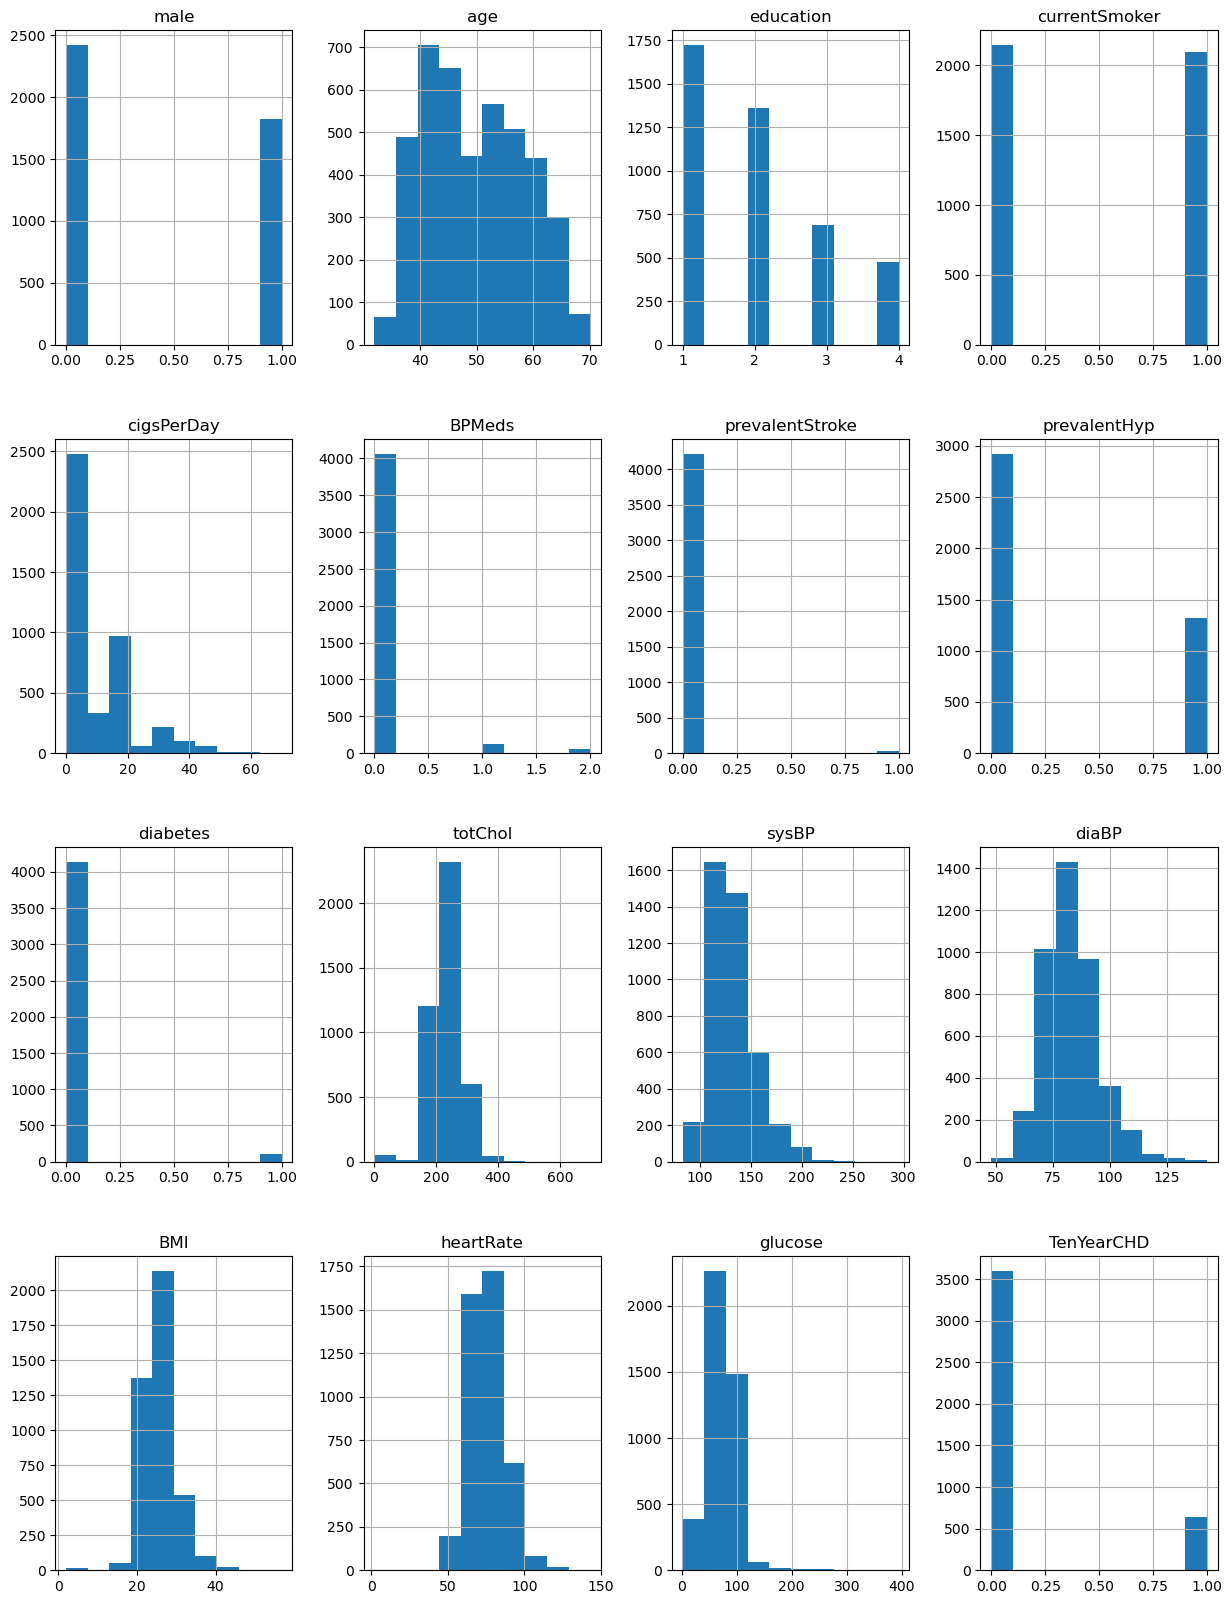

In [19]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

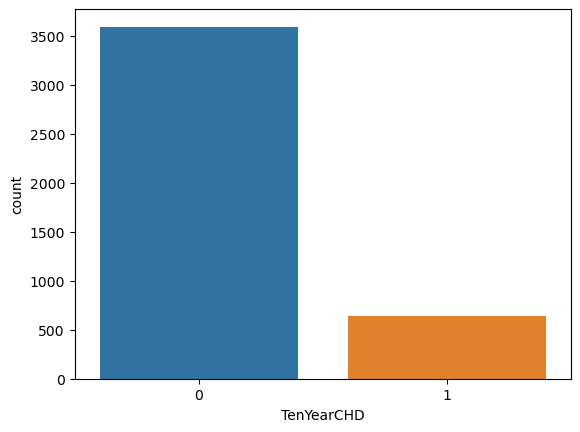

There are 3596 patients without heart disease and 644 patients with the disease


In [20]:
sns.countplot(x='TenYearCHD',data=df)
plt.show()
cases = df.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

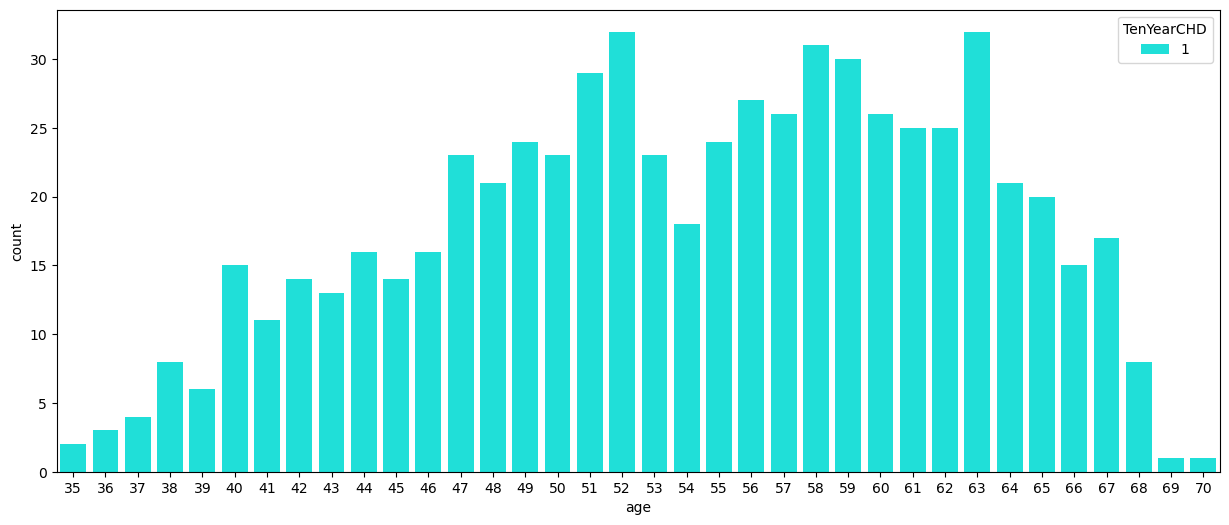

In [21]:
positive_cases = df[df['TenYearCHD'] == 1]
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = positive_cases, hue = 'TenYearCHD', palette= 'hsv')
plt.show()

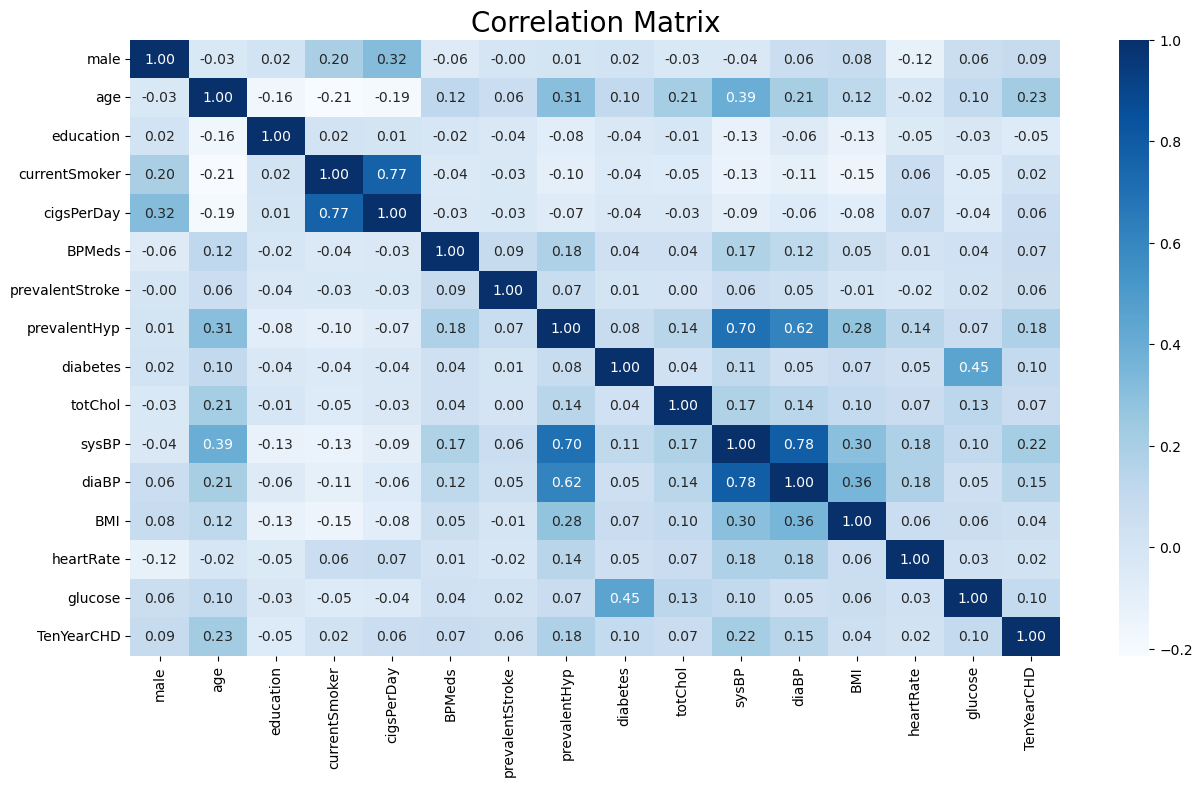

In [22]:
fig, ax = plt.subplots(figsize= [15,8])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "Blues")
ax.set_title("Correlation Matrix", fontsize = 20)
plt.show()

In [23]:
#dropping column educattion cause its irrelant
df = df.drop(['education'], axis=1)

In [24]:
# dropping  highly correlated features from the dataset

high_corr_feats = ['currentSmoker','diaBP','prevalentHyp','diabetes']
df.drop(high_corr_feats,axis=1,inplace=True)

In [25]:
df.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0.0,0,195.0,106.0,26.97,80.0,77.0,0
1,0,46,0.0,0.0,0,250.0,121.0,28.73,95.0,76.0,0
2,1,48,20.0,0.0,0,245.0,127.5,25.34,75.0,70.0,0
3,0,61,30.0,0.0,0,225.0,150.0,28.58,65.0,103.0,1
4,0,46,23.0,0.0,0,285.0,130.0,23.10,85.0,85.0,0


## training the model 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## applying smote

In [29]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_sample, y_train_sample = smote.fit_resample(X_train, y_train)

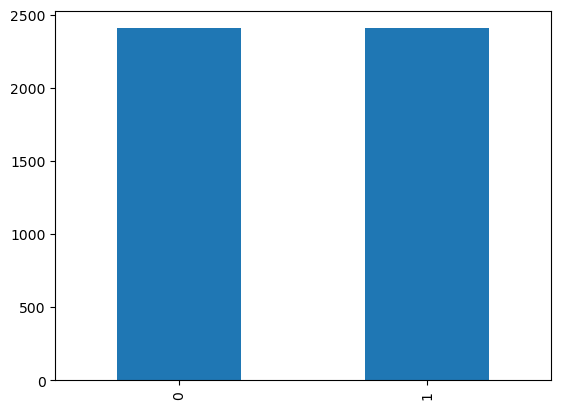

In [30]:
train_sample_chd_plot = y_train_sample.value_counts().plot(kind='bar')
plt.show()

## applying standard scaler

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()

In [33]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## training a logistic regression model

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {'C': [0.1,1.0,10], 'n_jobs':[1,2]} 

In [37]:
logmodel = LogisticRegression()

In [38]:
grid = GridSearchCV(logmodel,param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10], 'n_jobs': [1, 2]})

In [39]:
grid.best_score_

0.8538732394366197

In [40]:
grid.best_params_

{'C': 0.1, 'n_jobs': 1}

In [41]:
logmodel = LogisticRegression(C = 0.1, n_jobs = 1)

In [42]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=0.1, n_jobs=1)

## prediction and evaluation

In [43]:
pred = logmodel.predict(X_test)

In [44]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1189
           1       0.52      0.08      0.14       211

    accuracy                           0.85      1400
   macro avg       0.69      0.53      0.53      1400
weighted avg       0.81      0.85      0.80      1400



In [47]:
print(accuracy_score(y_test,pred))

0.85


In [48]:
print(confusion_matrix(y_test,pred))

[[1173   16]
 [ 194   17]]


## training a KNN model

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
k_range = list(range(1, 31))

In [52]:
param_grid = dict(n_neighbors=k_range)

In [54]:
knn = KNeighborsClassifier()

In [55]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)

In [56]:
grid_search=grid.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [57]:
grid_search.best_score_

0.8482394366197182

In [58]:
grid_search.best_params_

{'n_neighbors': 23}

In [59]:
knn = KNeighborsClassifier(n_neighbors = 26)

In [60]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=26)

In [61]:
preds = knn.predict(X_test)

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(confusion_matrix(y_test,preds))

[[1189    0]
 [ 207    4]]


In [64]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1189
           1       1.00      0.02      0.04       211

    accuracy                           0.85      1400
   macro avg       0.93      0.51      0.48      1400
weighted avg       0.87      0.85      0.79      1400



## training a random forest model

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
rfc = RandomForestClassifier(random_state=42)

In [68]:
param_grid = {'n_estimators': [200, 500], 'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}

In [69]:
grid_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [70]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [200, 500]})

In [71]:
grid_cv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 200}

In [72]:
rfc1 = RandomForestClassifier(n_estimators= 500, max_depth=4, criterion='entropy')

In [73]:
rfc1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=500)

In [74]:
predictions = rfc1.predict(X_test)

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
print(confusion_matrix(y_test,predictions))

[[1189    0]
 [ 210    1]]


In [77]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1189
           1       1.00      0.00      0.01       211

    accuracy                           0.85      1400
   macro avg       0.92      0.50      0.46      1400
weighted avg       0.87      0.85      0.78      1400

